# 实验结果可视化

## 一. 排序时间与数组规模、进程数量的关系

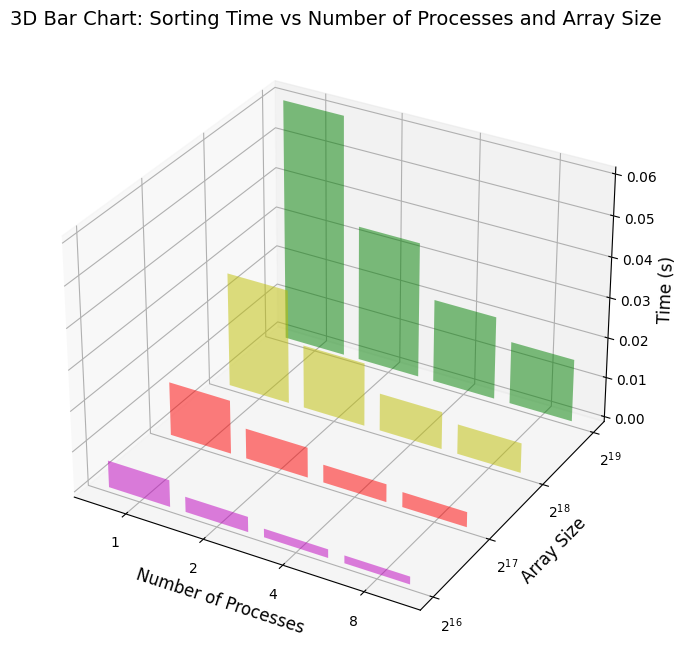

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 读取 CSV 数据
df = pd.read_csv('../data/run_time.csv')

# 确定确切的列名，注意可能有额外的空格
array_size_col = 'array_size          '
time_col = 'Time(s)             '
speedup_col = 'Speedup             '
procnum_col = 'procnum             '


# 提取数据
array_size = df[array_size_col]
time = df[time_col]
speedup = df[speedup_col]
procnum = df[procnum_col]

import math
def _log2_exponent_get(number: float) -> str:
    result = math.log2(number)
    if not result.is_integer():
        raise ValueError("The result exponent must be an integer")
    result = int(result)
    return r"$\mathregular{2^{" + str(result) + r"}}$"


import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import math
import random

# 假设你已经有了 array_size, time, speedup, procnum 这几个变量
# 其他参数
process_range = tuple(sorted(df[procnum_col].unique()))  # procnum 范围从小到大排列
size_range = tuple(sorted(df[array_size_col].unique()))  # array_size 范围从小到大排列
colors = ["m", "r", "y", "g"]


# 构建 runtime_dicts
runtime_keys = [(size, process_range) for size in size_range]
runtime_dicts = {runtime_key: list() for runtime_key in runtime_keys}
for size in size_range:
    for process in process_range:
        runtime_dicts[(size, process_range)].append(df[(df[procnum_col] == process) & (df[array_size_col] == size)][time_col].iloc[0])


length_range = [float(key[0]) for key in sorted(runtime_dicts.keys())]
selected_process_range = random.choice(list(runtime_dicts.keys()))[-1]
size_labels = [_log2_exponent_get(size) for size in size_range]
size_arrange = list(range(len(size_range)))
process_labels = [str(i) for i in selected_process_range]
process_arrange = list(range(len(selected_process_range)))
runtime_matrix = [runtime_dicts[key] for key in sorted(runtime_dicts.keys())]
iterate = zip(runtime_matrix, size_arrange, size_labels, colors)

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Number of Processes', fontsize=12)
ax.set_ylabel('Array Size', fontsize=12)
ax.set_zlabel('Time (s)', fontsize=12)

colors = plt.cm.viridis(speedup / speedup.max())

plt.title('3D Bar Chart: Sorting Time vs Number of Processes and Array Size', fontsize=14)
plt.xticks(process_arrange, process_labels)
plt.yticks(size_arrange, size_labels)
for vector, length, label, color in iterate:
    ax.bar(process_arrange,
           vector,
           zs=length,
           zdir='y',
           color=color,
           alpha=0.5)

# Show the plot
plt.savefig(f'plots/PSRS_runtime.png')
plt.show()

## 二. 加速比与数组规模、进程数量的关系

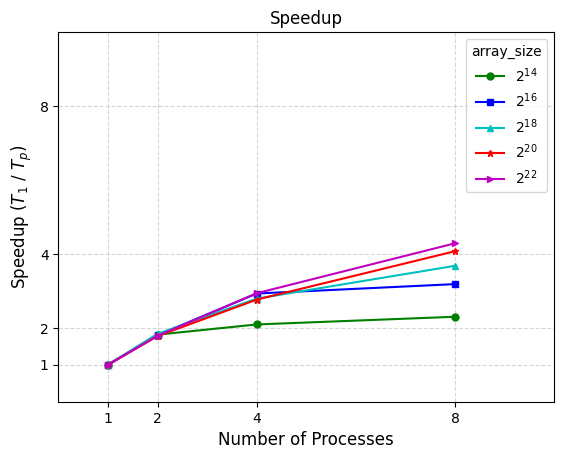

In [2]:
import pandas as pd
def get_df(fname):
    df = pd.read_csv(fname)
    dic = [k.strip() for k in df.keys()]
    df.columns = dic
    df.keys()
    keys = df.select_dtypes(include='object').keys()
    for key in keys:
        df[key] = df[key].map(lambda s: s.strip())
    return df
df_speedup = get_df('../data/run_time_speedup.csv')
df_speedup
process_range = tuple(2 ** e for e in range(0,4))  # procnum 范围从小到大排列
size_range = tuple(2 ** e for e in range(14, 24, 2))  # array_size
def speedup_plot():
    legend_range = ("o", "s", "^", "*",">")
    color_range = ("g", "b", "c", "r","m")
    speedup_vector = list()

    plt.title("Speedup")
    plt.xticks(process_range)
    plt.yticks(process_range)
    plt.xlabel("Number of Processes", fontsize="large")
    plt.ylabel(r"Speedup ($T_1$ / $T_p$)", fontsize="large")
    plt.axis([0, process_range[-1] + 2, 0, process_range[-1] + 2])


    for length, legend, color in zip(size_range, legend_range, color_range):
        speedup_vector.clear()
        for process in process_range:
            speedup = df_speedup[(df_speedup['array_size'] == length)&(df_speedup['procnum']==process)]['Speedup'].iloc[0]
            speedup_vector.append(speedup)

        plt.plot(process_range, speedup_vector,
                 color=color, label=_log2_exponent_get(length), linestyle="-",
                  marker=legend,markersize=5)
    plt.grid(True, which="both", linestyle="--", alpha=0.5)
    plt.legend(loc="best", title="array_size")
    plt.savefig('./plots/speedup_vs_procnum_and_size')
    plt.show()
speedup_plot()


## 三. PSRS算法的四个阶段的用时与数组规模的关系

Index(['array_size', 'phase1', 'phase2', 'phase3', 'phase4'], dtype='object')


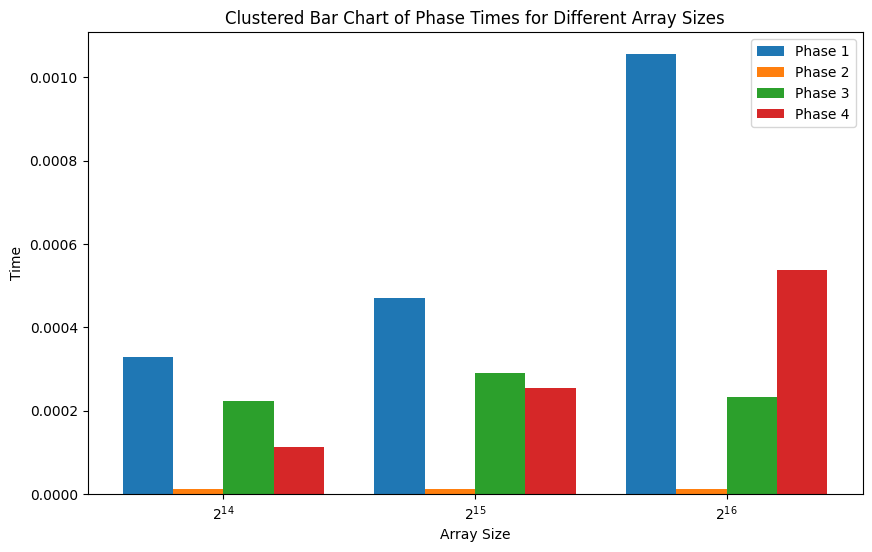

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
# 读取CSV文件
df = pd.read_csv('../data/run_time_per_phase.csv')

# 设置图形大小
plt.figure(figsize=(10, 6))

df.columns = df.columns.str.strip()
print(df.columns)

# 提取数据
array_sizes = df['array_size']
phase1_times = df['phase1']
phase2_times = df['phase2']
phase3_times = df['phase3']
phase4_times = df['phase4']



# 绘制簇状柱状图
bar_width = 0.2
bar_positions = range(len(array_sizes))

plt.bar(bar_positions, phase1_times, width=bar_width, label='Phase 1')
plt.bar([pos + bar_width for pos in bar_positions], phase2_times, width=bar_width, label='Phase 2')
plt.bar([pos + 2 * bar_width for pos in bar_positions], phase3_times, width=bar_width, label='Phase 3')
plt.bar([pos + 3 * bar_width for pos in bar_positions], phase4_times, width=bar_width, label='Phase 4')

# 设置图形标签和标题
plt.xlabel('Array Size')
plt.ylabel('Time')
plt.title('Clustered Bar Chart of Phase Times for Different Array Sizes')
plt.xticks([pos + 1.5 * bar_width for pos in bar_positions],[f'$2^{{{int(math.log2(size))}}}$' for size in array_sizes])
plt.legend()

# 显示图形
plt.savefig('./plots/runtime_per_phase')
plt.show()
